# importing the Python libery

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import warnings
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn import datasets

iris = datasets.load_iris()

warnings.filterwarnings("ignore")

# Data collection


In [2]:
data=pd.read_csv("Iris.csv")
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000    

# analyze dataset and modling Decision Tree classifer


In [4]:
from sklearn.model_selection import train_test_split
data.drop("Id",axis=1,inplace=True)
x=data.drop(['Species'],axis=1)
y=data['Species']

y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [5]:
y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
new_y=y.map({"Iris-setosa":0,"Iris-versicolor":1,"Iris-virginica":2})

In [7]:
new_y.head(200)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [8]:
X_train,X_test,y_train,y_test=train_test_split(x,new_y,test_size=0.33,random_state=42)

In [9]:
dt=DecisionTreeClassifier(max_leaf_nodes=10,random_state=33)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=33)

In [10]:
y_pre=dt.predict(X_test)

In [11]:
accuracy_score(y_test,y_pre)*100

98.0

In [12]:
matrix_confusion=confusion_matrix(y_test,y_pre)

<Axes: >

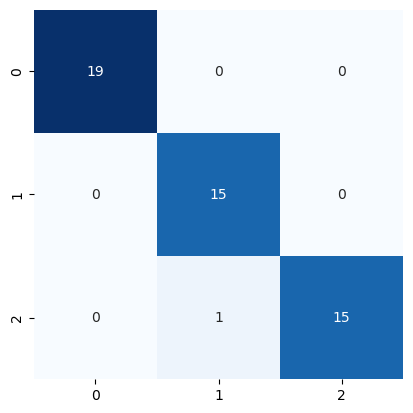

In [13]:
import seaborn as sns
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

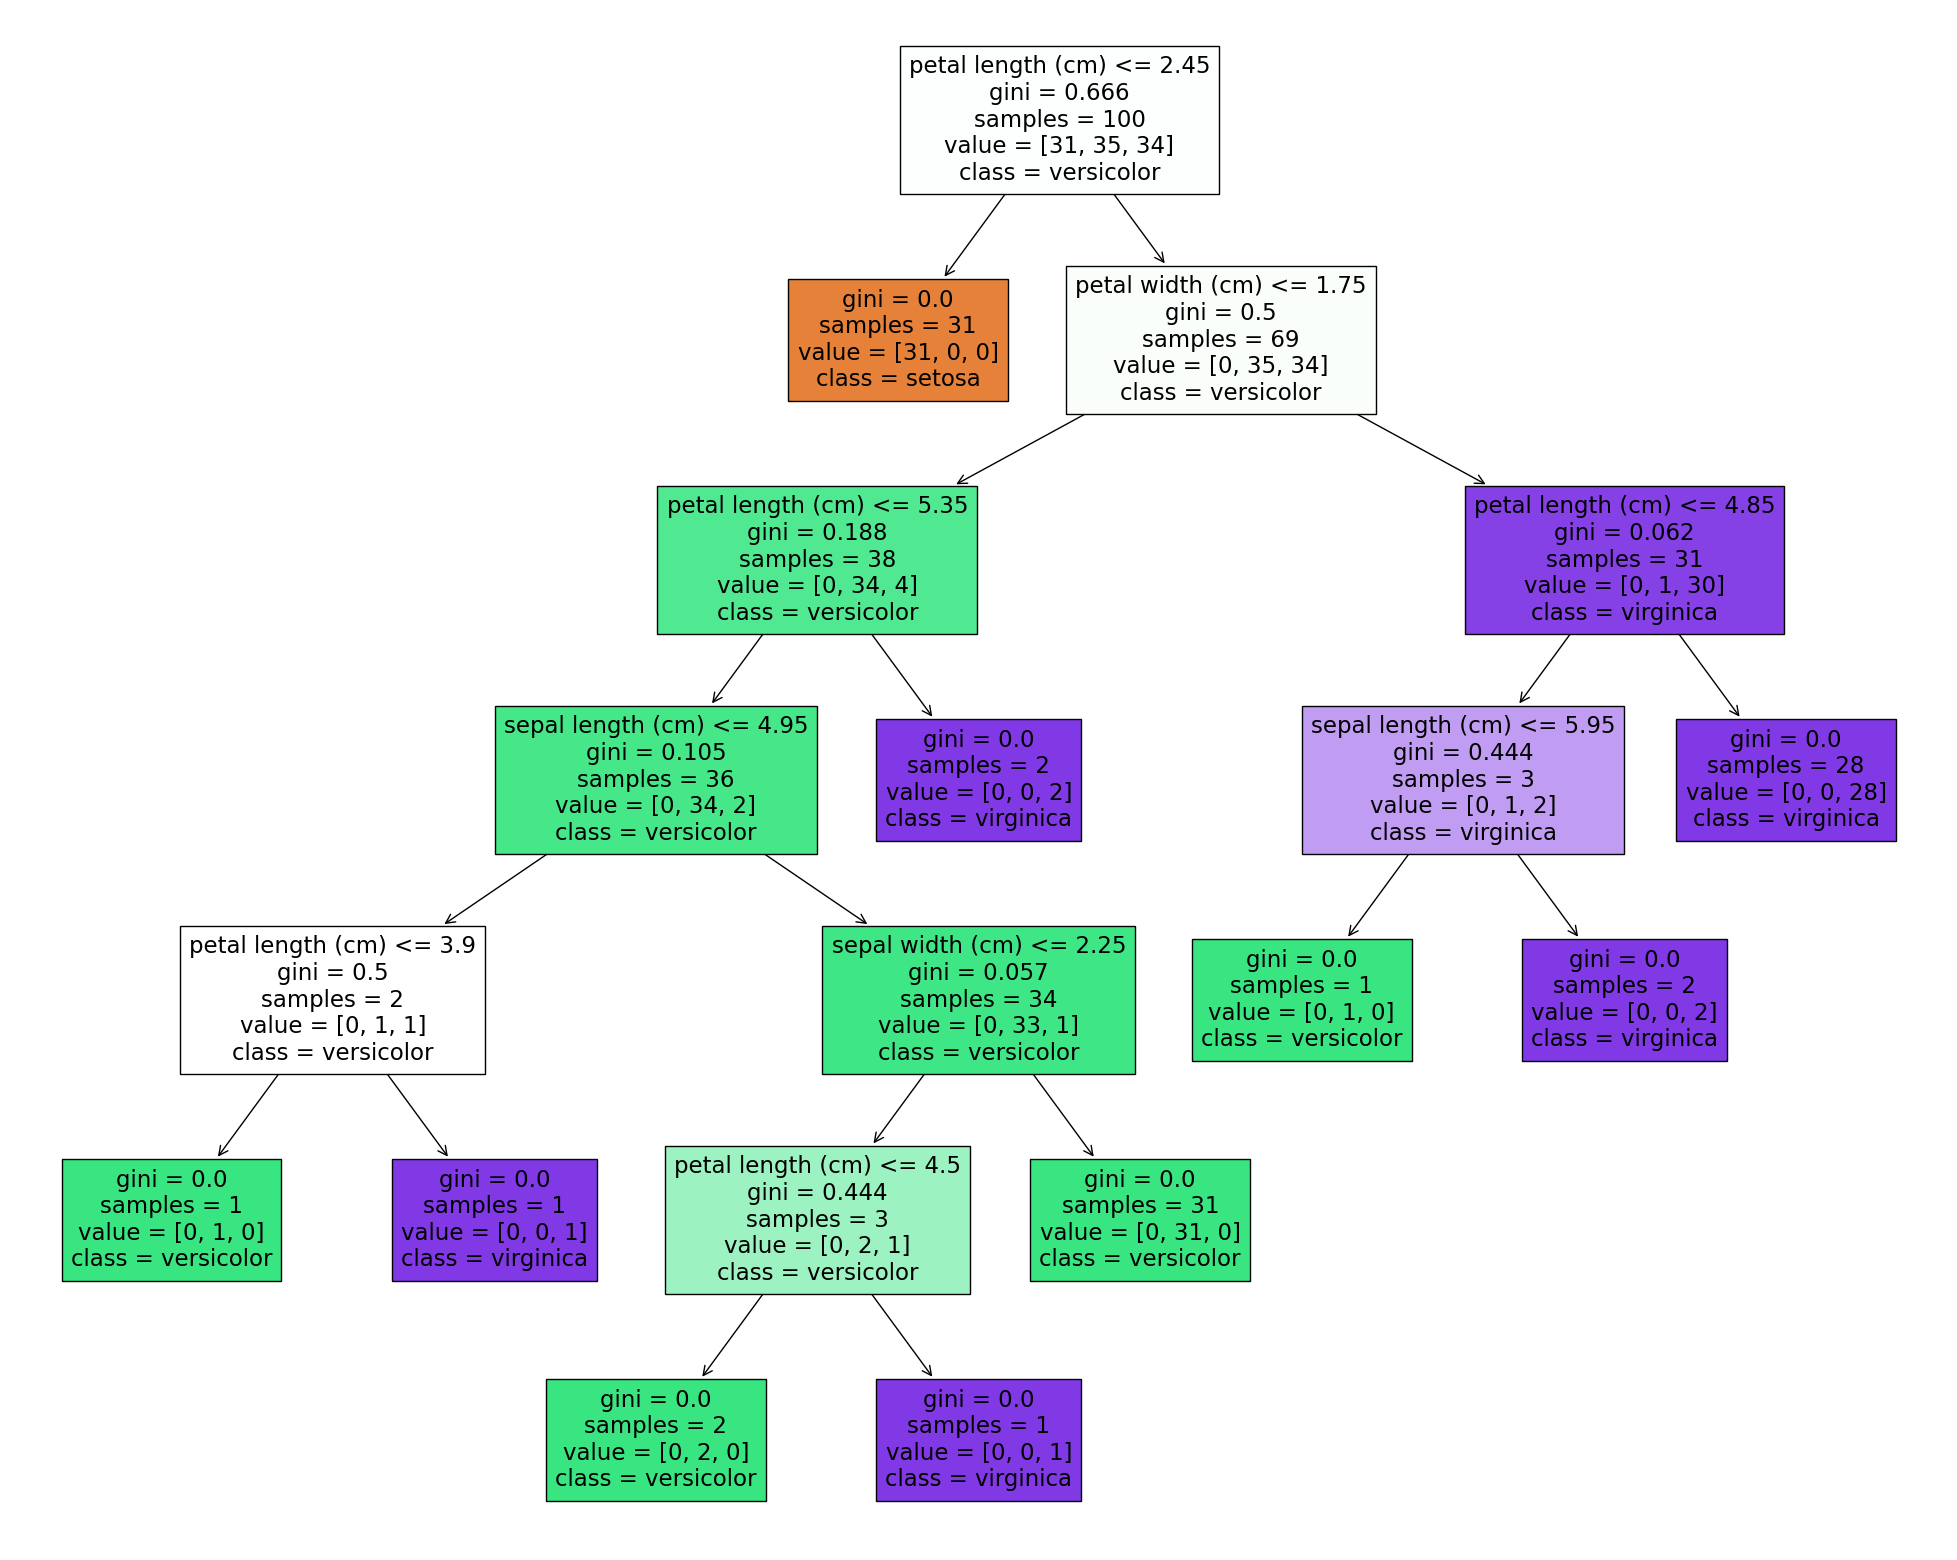

In [15]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

In [16]:
text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 5.35
|   |   |   |--- feature_0 <= 4.95
|   |   |   |   |--- feature_2 <= 3.90
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  3.90
|   |   |   |   |   |--- class: 2
|   |   |   |--- feature_0 >  4.95
|   |   |   |   |--- feature_1 <= 2.25
|   |   |   |   |   |--- feature_2 <= 4.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_2 >  4.50
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_1 >  2.25
|   |   |   |   |   |--- class: 1
|   |   |--- feature_2 >  5.35
|   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_0 <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  5.95
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



In [36]:
M={"Iris-setosa":0,"Iris-versicolor":1,"Iris-virginica":2}
test=dt.predict([[5.1,3.5,1.4,0.2]])

In [37]:
if test==0:
    print("Iris-setosa")
elif test==1:
    print("Iris-versicolor")
elif test==2:
    print("Iris-virginica")

Iris-setosa
